# Project: Wrangling and Analyze Data

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import requests
import datetime
import time
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [100]:
df=pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [101]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
data = requests.get(url)
with open (url.split('/')[-1], mode='wb') as file:
    file.write(data.content)

In [102]:
image_data = pd.read_csv('image-predictions.tsv', sep='\t')
image_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save it in a JSON file

consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'


auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()


with open('tweet_json.txt', 'w') as outfile:
    
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [7]:
temp = []
with open('tweet_json.txt', encoding='utf-8') as js_file:
    for i in js_file:
        data = json.loads(i)
        tweet_id = data['id']
        tweet = data['full_text']
        url1 = tweet[tweet.find('https'):]
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']  
        retweet_status = data['retweet_status'] = data.get('retweet_status', 'Original tweet')
        if retweet_status == 'Original tweet':
            url = url1
        else:
            retweeted_status = 'A retweet'
            url = 'A retweet'
        
    
        temp.append({'tweet_id': tweet_id,'favorite_count': favorite_count,'retweet_status': retweet_status,
                     'url': url,'retweet_count': retweet_count})

# create a new dataframe 
df_new = pd.DataFrame(temp, columns = ['tweet_id', 'favorite_count','retweet_count', 'retweet_status', 'url'])
                                          
                                                           
df_new.head()

df_new.to_csv('tweet_json.txt', index=False)

In [103]:
dfj = pd.read_csv('tweet_json.txt')
dfj.head()

,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,34505,7184,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,29912,5394,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,22512,3560,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,37726,7400,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36008,7942,Original tweet,https://t.co/AtUZn91f7f


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [104]:
df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
435,820446719150292993,NaN,NaN,2017-01-15 01:45:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Peaches. She's the ulti...,8.001414e+17,4.196984e+09,2016-11-20 00:59:15 +0000,https://twitter.com/dog_rates/status/800141422...,13,10,Peaches,None,None,None,None
1270,709449600415961088,NaN,NaN,2016-03-14 18:42:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Karma. She's just a head. Lost body durin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709449600...,10,10,Karma,None,None,None,None
2063,671159727754231808,NaN,NaN,2015-11-30 02:52:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Anthony. He just finished up his maste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671159727...,5,10,Anthony,None,None,None,None
1398,699775878809702401,NaN,NaN,2016-02-17 02:02:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fillup. Spaghetti is his main weakness. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699775878...,11,10,Fillup,None,None,None,None
1483,693262851218264065,NaN,NaN,2016-01-30 02:41:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I hope you guys enjoy this beautiful snowy pup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693262851...,11,10,None,None,None,pupper,None
2172,669327207240699904,NaN,NaN,2015-11-25 01:30:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just got home from college. Dis my dog. She do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669327207...,13,10,None,None,None,None,None
1487,693095443459342336,NaN,NaN,2016-01-29 15:36:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. He doesn't understand your fancy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693095443...,10,10,Milo,None,None,pupper,None
1990,672640509974827008,NaN,NaN,2015-12-04 04:56:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leonidas. He just got rekt by a snowba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672640509...,9,10,Leonidas,None,None,None,None
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719991154...,10,10,None,doggo,None,None,None
27,886736880519319552,NaN,NaN,2017-07-16 23:58:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mingus. He's a wonderful father to his...,NaN,NaN,NaN,"https://www.gofundme.com/mingusneedsus,https:/...",13,10,Mingus,None,None,None,None


In [105]:
image_data.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1354,760252756032651264,https://pbs.twimg.com/media/Coz12OLWgAADdys.jpg,1,radio_telescope,0.155279,False,dam,0.154515,False,crane,0.098040,False
261,670786190031921152,https://pbs.twimg.com/media/CU8ceuxWUAALMEo.jpg,1,dingo,0.777124,False,Pembroke,0.127438,True,Cardigan,0.024007,True
246,670474236058800128,https://pbs.twimg.com/media/CU4AwqQWUAAEgE2.jpg,1,wool,0.070076,False,siamang,0.062536,False,gorilla,0.058894,False
734,686947101016735744,https://pbs.twimg.com/media/CYiGvn-UwAEe4wL.jpg,1,refrigerator,0.799795,False,medicine_chest,0.182538,False,ice_bear,0.001431,False
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
544,677301033169788928,https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg,1,Japanese_spaniel,0.661178,True,Pekinese,0.150119,True,Chihuahua,0.119720,True
1181,738184450748633089,https://pbs.twimg.com/media/Cj6O1G9UYAAIU-1.jpg,1,Bedlington_terrier,0.289471,True,standard_poodle,0.173685,True,Great_Pyrenees,0.157081,True
726,686358356425093120,https://pbs.twimg.com/media/CYZvRttWYAE_RXc.jpg,1,pug,0.985237,True,bull_mastiff,0.008841,True,boxer,0.002321,True
990,707995814724026368,https://pbs.twimg.com/media/CdNOb17WwAA5z4A.jpg,1,agama,0.172087,False,Gila_monster,0.126978,False,lumbermill,0.050400,False
643,681523177663676416,https://pbs.twimg.com/media/CXVBtX_WwAEuqbP.jpg,1,Norfolk_terrier,0.205067,True,German_shepherd,0.160439,True,chow,0.156234,True


In [106]:
dfj.sample(10)

,tweet_id,favorite_count,retweet_count,retweet_status,url
1780,676897532954456065,2099,667,Original tweet,https://t.co/Avq4awulqk
1801,676237365392908289,1120,257,Original tweet,https://t.co/dOLQddhXLZ
1038,740711788199743490,3214,887,Original tweet,https://t.co/CmLoKMbOHv
555,801127390143516673,0,3807,Original tweet,https://…
464,815639385530101762,7963,1580,Original tweet,https://t.co/bLZuOh9sKy
419,820314633777061888,3234,537,Original tweet,https://t.co/XQlmPTLHPl https://t.co/ZNIkkHgtYE
1460,693095443459342336,1761,426,Original tweet,https://t.co/OhodPIDOpW
2028,671357843010908160,361,141,Original tweet,https://t.co/lS1TIDagIb
192,853760880890318849,26656,5251,Original tweet,https://t.co/yT4vw8y77x
2162,668960084974809088,640,220,Original tweet,https://t.co/952hUV6RiK


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [108]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [109]:
dfj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 5 columns):
tweet_id          2328 non-null int64
favorite_count    2328 non-null int64
retweet_count     2328 non-null int64
retweet_status    2328 non-null object
url               2328 non-null object
dtypes: int64(3), object(2)
memory usage: 91.0+ KB


In [110]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [111]:
image_data.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [112]:
dfj.isnull().sum()

tweet_id          0
favorite_count    0
retweet_count     0
retweet_status    0
url               0
dtype: int64

In [113]:
sum(df.duplicated())

0

In [114]:
sum(image_data.duplicated())

0

In [115]:
sum(dfj.duplicated())

0

In [116]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [117]:
image_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [118]:
dfj.describe()

,tweet_id,favorite_count,retweet_count
count,2.328000e+03,2328.000000,2328.000000
mean,7.418403e+17,7203.446306,2534.678265
std,6.823143e+16,11188.413543,4291.460125
min,6.660209e+17,0.000000,1.000000
25%,6.781974e+17,1250.250000,512.000000
50%,7.180382e+17,3117.000000,1179.000000
75%,7.986673e+17,8792.750000,2931.750000
max,8.924206e+17,147946.000000,72655.000000


In [119]:
df['name'].value_counts()

None            745
a                55
Charlie          12
Oliver           11
Cooper           11
Lucy             11
Tucker           10
Lola             10
Penny            10
Winston           9
Bo                9
the               8
Sadie             8
Toby              7
Buddy             7
Daisy             7
Bailey            7
an                7
Rusty             6
Leo               6
Milo              6
Oscar             6
Stanley           6
Koda              6
Scout             6
Jack              6
Dave              6
Jax               6
Bella             6
Bentley           5
               ... 
Dunkin            1
Bilbo             1
Alexanderson      1
Blipson           1
Godi              1
Taz               1
Ralpher           1
Sprout            1
Horace            1
Toffee            1
Gert              1
Dot               1
Ember             1
Torque            1
Sparky            1
Remus             1
Rumpole           1
Cheryl            1
Cal               1


In [120]:
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [121]:
dfj.nunique()

tweet_id          2328
favorite_count    1989
retweet_count     1670
retweet_status       1
url               2169
dtype: int64

In [122]:
image_data.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [123]:
df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [124]:
df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### Quality issues
1. Remove retweets from the dataset.

2. Timestamp is in string format and should be in datetime format.

3. Tweet_id is an integer, but should be a string.

4. Many dogs do not have names and there is missing data in the names column.

5. The dog stages columns doggo, floofer, pupper, and puppo contain many null or missing values.

6. img_num column should be in string format.

7. Remove columns with too many missing values: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

8. The types of dogs in columns p1, p2, and p3 had some uppercase and lowercase letters.
9. retweet_count and favorite_count columns should be integers, and not floats.

### Tidiness issues
1. doggo, floofer, pupper, puppo these 4 variables should be combined into one categorical variable - dog_type.
2. merge the dataframe twitter_archive, dataframe image_predictions, and tweet_json dataframes


 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [125]:
# Make copies of original pieces of data
twitter = df.copy()
image = image_data.copy()
json = dfj.copy()

### Issue #1:

#### Define:
Merge the json, twitter, and image dataframes into a single dataframe.

#### Code

In [126]:
df2 = pd.concat([twitter, image, json], join='outer', axis=1)

#### Test

In [127]:
df2.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.156665,True,Shetland_sheepdog,0.061428,True,8.924206e+17,34505.0,7184.0,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.074192,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,29912.0,5394.0,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.138584,True,bloodhound,0.116197,True,8.918152e+17,22512.0,3560.0,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.360687,True,miniature_pinscher,0.222752,True,8.916896e+17,37726.0,7400.0,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.243682,True,Doberman,0.154629,True,8.913276e+17,36008.0,7942.0,Original tweet,https://t.co/AtUZn91f7f


In [128]:
df2.shape

(2356, 34)

In [129]:
df2.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_id',
       'favorite_count', 'retweet_count', 'retweet_status', 'url'],
      dtype='object')

### Issue #2:

#### Define
Remove retweets from the dataset and retain original tweets only.

#### Code

In [130]:
df2.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
           'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [131]:
df2.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.156665,True,Shetland_sheepdog,0.061428,True,8.924206e+17,34505.0,7184.0,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.074192,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,29912.0,5394.0,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.138584,True,bloodhound,0.116197,True,8.918152e+17,22512.0,3560.0,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.360687,True,miniature_pinscher,0.222752,True,8.916896e+17,37726.0,7400.0,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.243682,True,Doberman,0.154629,True,8.913276e+17,36008.0,7942.0,Original tweet,https://t.co/AtUZn91f7f


In [132]:
df2.shape

(2356, 29)

### Issue #3:

#### Define
Change img_num to string datatype.

#### Code

In [133]:
df2['img_num'] = df2['img_num'].astype(str)

#### Test

In [134]:
type(df2['img_num'][0])

str

### Issue #4:

#### Define
Change tweet_id from integer to string.

#### Code

In [135]:
df2['tweet_id'] = df2['tweet_id'].astype(str)

#### Test

In [136]:
type(df2.iloc[0,0])

str

### Issue #5:

#### Define
Change timestamp from string to datetime.<br>
Datetime format:<br>
%m Month as a number 01-12 12<br>
%Y Year, full version (eg. 2021) <br>
%d Day of month 01-31<br>

#### Code

In [137]:
df2['timestamp'] = pd.to_datetime(df2['timestamp'], format = "%Y-%m-%d ")

#### Test

In [138]:
df2.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.156665,True,Shetland_sheepdog,0.061428,True,8.92420643555e+17,34505.0,7184.0,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.074192,True,Rhodesian_ridgeback,0.072010,True,8.92177421306e+17,29912.0,5394.0,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.138584,True,bloodhound,0.116197,True,8.91815181378e+17,22512.0,3560.0,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.360687,True,miniature_pinscher,0.222752,True,8.9168955728e+17,37726.0,7400.0,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.243682,True,Doberman,0.154629,True,8.91327558927e+17,36008.0,7942.0,Original tweet,https://t.co/AtUZn91f7f


In [139]:
type(df2['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Issue #6:

#### Define
Fix the missing data in the names column and replace the incomplete values with nulls.

#### Code

In [140]:
df2['name']=df2.name.replace(['None', 'a', 'an', 'very','the', 'not', 'quite', 'actually','by'], 'None')

#### Test

In [141]:
df2['name'].value_counts()

None         829
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
Toby           7
Daisy          7
Buddy          7
Bailey         7
Oscar          6
Koda           6
Jack           6
Milo           6
Bella          6
Leo            6
Stanley        6
Jax            6
Scout          6
Dave           6
Rusty          6
Louis          5
Gus            5
Chester        5
Alfie          5
            ... 
Godi           1
Petrick        1
Huxley         1
Rueben         1
Liam           1
Willow         1
Stella         1
Ember          1
Kellogg        1
Torque         1
Sparky         1
Remus          1
Rumpole        1
Cheryl         1
Horace         1
Cal            1
Meatball       1
Monty          1
Sundance       1
Enchilada      1
Strudel        1
Clybe          1
Blu            1
Zeek           1
Scruffers      1
Remy           1
Sprout         1
Ralpher       

### Issue #7:

#### Define
Merge the dog stages columns doggo, floofer, pupper to a single column.
There are some tweets that contain multiple dog stages, and this data will also need to be cleaned.

#### Code

In [142]:
df2['dog_type']=df2['doggo']+df2['floofer']+df2['pupper']+df2['puppo']

In [143]:
df2['dog_type'].value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: dog_type, dtype: int64

In [144]:
df2.loc[df2.dog_type == 'doggoNonepupperNone', 'dog_type'] = 'multiple'
df2.loc[df2.dog_type == 'doggoNoneNonepuppo', 'dog_type'] = 'multiple'
df2.loc[df2.dog_type == 'doggoflooferNoneNone', 'dog_type'] = 'multiple'

In [145]:
df2['dog_type'].value_counts()

NoneNoneNoneNone       1976
NoneNonepupperNone      245
doggoNoneNoneNone        83
NoneNoneNonepuppo        29
multiple                 14
NoneflooferNoneNone       9
Name: dog_type, dtype: int64

In [146]:
df2['dog_type'] = df2['dog_type'].str.extract('(doggo|floofer|pupper|puppo|multiple)')

In [147]:
df2.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [148]:
df2.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'tweet_id', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'tweet_id', 'favorite_count', 'retweet_count',
       'retweet_status', 'url', 'dog_type'],
      dtype='object')

In [149]:
df2.dog_type.value_counts()

pupper      245
doggo        83
puppo        29
multiple     14
floofer       9
Name: dog_type, dtype: int64

### Issue #8:

#### Define
Change the types of dogs in columns p1, p2, and p3 to lowercase letters.

#### Code

In [150]:
df2['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog',
       'box_turtle', 'chow', 'shopping_cart', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'hen', 'desktop_computer',
       'Italian_greyhound', 'Maltese_dog', 'three-toed_sloth', 'ox',
       'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'seat_belt', 'snail',
       'miniature_schnauzer', 'Airedale', 'triceratops', 'swab', 'hay',
       'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 'teddy', 

In [151]:
df2['p2'].unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone', 'Rottweiler',
       'English_springer', 'mud_turtle', 'Tibetan_mastiff',
       'shopping_basket', 'komondor', 'Yorkshire_terrier',
       'English_foxhound', 'bull_mastiff', 'German_shepherd', 'Shih-Tzu',
       'Newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'Chesapeake_Bay_retriever', 'Siberian_husky', 'skunk',
       'Afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'Irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'Weimaraner', 'slug', 'Brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'African_hunting_dog', 'vizsla', 'doormat',
       'pug', 'Italian_greyhound', 'Samoyed', 'Pomeranian',
       'miniature_poodle', 'Lakeland_terrier', 'Irish_setter', 'swab',
       'malamute', 'bath_towel', 'Border_collie', 'Leonberg', 'drake',
       'French_bulldog', 'ice_bear', 

In [152]:
df2['p3'].unique()

array(['Shetland_sheepdog', 'Rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'Doberman', 'Greater_Swiss_Mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'Labrador_retriever', 'Pekinese',
       'Ibizan_hound', 'French_bulldog', 'malinois', 'Dandie_Dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'Eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'Chihuahua', 'Shih-Tzu',
       'Pomeranian', 'dingo', 'power_drill', 'Saluki', 'Great_Pyrenees',
       'West_Highland_white_terrier', 'collie', 'toy_poodle', 'vizsla',
       'acorn', 'giant_schnauzer', 'teddy', 'common_iguana', 'wig',
       'water_buffalo', 'coyote', 'seat_belt', 'kelpie', 'space_heater',
       'Brabancon_griffon', 'standard_poodle', 'beagle',
       'Irish_water_spaniel', 'bluetick', 'Weimaraner',
       'Chesapeake_Bay_retriever', 'toilet_tiss

In [153]:
df2['p1'] = df2['p1'].str.lower()
df2['p2'] = df2['p2'].str.lower()
df2['p3'] = df2['p3'].str.lower()

#### Test

In [154]:
df2['p1'].unique()

array(['welsh_springer_spaniel', 'redbone', 'german_shepherd',
       'rhodesian_ridgeback', 'miniature_pinscher', 'bernese_mountain_dog',
       'box_turtle', 'chow', 'shopping_cart', 'miniature_poodle',
       'golden_retriever', 'gordon_setter', 'walker_hound', 'pug',
       'bloodhound', 'lhasa', 'english_setter', 'hen', 'desktop_computer',
       'italian_greyhound', 'maltese_dog', 'three-toed_sloth', 'ox',
       'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier',
       'chihuahua', 'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'blenheim_spaniel', 'pembroke', 'llama', 'chesapeake_bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'ibizan_hound',
       'border_collie', 'labrador_retriever', 'seat_belt', 'snail',
       'miniature_schnauzer', 'airedale', 'triceratops', 'swab', 'hay',
       'hyena', 'jigsaw_puzzle', 'west_highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'rottweiler',
       'siberian_husky', 'teddy', 

In [155]:
df2['p2'].unique()

array(['collie', 'miniature_pinscher', 'malinois', 'redbone', 'rottweiler',
       'english_springer', 'mud_turtle', 'tibetan_mastiff',
       'shopping_basket', 'komondor', 'yorkshire_terrier',
       'english_foxhound', 'bull_mastiff', 'german_shepherd', 'shih-tzu',
       'newfoundland', 'cock', 'desk', 'toy_terrier', 'toy_poodle',
       'otter', 'chesapeake_bay_retriever', 'siberian_husky', 'skunk',
       'afghan_hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker_spaniel', 'chow', 'irish_terrier', 'chain_saw', 'beagle',
       'giant_schnauzer', 'labrador_retriever', 'pembroke', 'chihuahua',
       'weimaraner', 'slug', 'brittany_spaniel', 'standard_schnauzer',
       'teddy', 'armadillo', 'african_hunting_dog', 'vizsla', 'doormat',
       'pug', 'italian_greyhound', 'samoyed', 'pomeranian',
       'miniature_poodle', 'lakeland_terrier', 'irish_setter', 'swab',
       'malamute', 'bath_towel', 'border_collie', 'leonberg', 'drake',
       'french_bulldog', 'ice_bear', 

In [156]:
df2['p3'].unique()

array(['shetland_sheepdog', 'rhodesian_ridgeback', 'bloodhound',
       'miniature_pinscher', 'doberman', 'greater_swiss_mountain_dog',
       'terrapin', 'fur_coat', 'golden_retriever',
       'soft-coated_wheaten_terrier', 'labrador_retriever', 'pekinese',
       'ibizan_hound', 'french_bulldog', 'malinois', 'dandie_dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature_poodle',
       'great_grey_owl', 'groenendael', 'eskimo_dog', 'hamster', 'briard',
       'papillon', 'flat-coated_retriever', 'gar', 'chihuahua', 'shih-tzu',
       'pomeranian', 'dingo', 'power_drill', 'saluki', 'great_pyrenees',
       'west_highland_white_terrier', 'collie', 'toy_poodle', 'vizsla',
       'acorn', 'giant_schnauzer', 'teddy', 'common_iguana', 'wig',
       'water_buffalo', 'coyote', 'seat_belt', 'kelpie', 'space_heater',
       'brabancon_griffon', 'standard_poodle', 'beagle',
       'irish_water_spaniel', 'bluetick', 'weimaraner',
       'chesapeake_bay_retriever', 'toilet_tiss

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [157]:
df2.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [158]:
df3=pd.read_csv('twitter_archive_master.csv')
df3.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_id.1,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,tweet_id.2,favorite_count,retweet_count,retweet_status,url,dog_type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,6.660209e+17,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,True,shetland_sheepdog,0.061428,True,8.924206e+17,34505.0,7184.0,Original tweet,https://t.co/MgUWQ76dJU,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6.660293e+17,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,True,rhodesian_ridgeback,0.072010,True,8.921774e+17,29912.0,5394.0,Original tweet,https://t.co/0Xxu71qeIV,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,6.660334e+17,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,True,bloodhound,0.116197,True,8.918152e+17,22512.0,3560.0,Original tweet,https://t.co/wUnZnhtVJB,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,6.660442e+17,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,True,miniature_pinscher,0.222752,True,8.916896e+17,37726.0,7400.0,Original tweet,https://t.co/tD36da7qLQ,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,6.660492e+17,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,True,doberman,0.154629,True,8.913276e+17,36008.0,7942.0,Original tweet,https://t.co/AtUZn91f7f,NaN


### 1. Number of dogs of each dog type

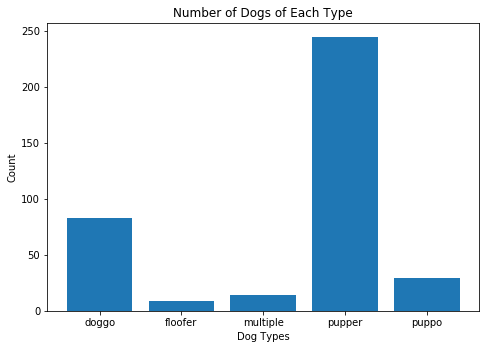

In [159]:
count=list(df3['dog_type'].value_counts())
label=list(df3['dog_type'].value_counts().index)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(label,count)
plt.xlabel("Dog Types")
plt.ylabel("Count")
ax.set_title("Number of Dogs of Each Type")
plt.show()

### 2. Favorite count by dog type

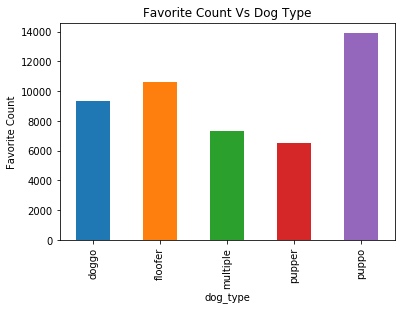

In [162]:
counts = df3.groupby(['dog_type']).favorite_count.mean()
counts.plot(kind='bar')
plt.ylabel('Favorite Count')
plt.title('Favorite Count Vs Dog Type');

### 3. Count of tweets by img_num value

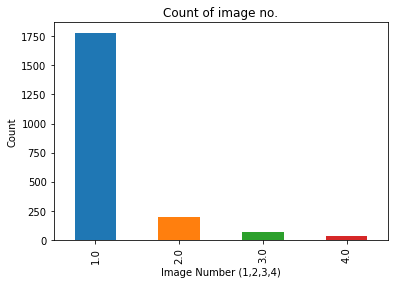

In [213]:
img=df3[~df3['img_num'].isna()]
img_count = df3['img_num'].value_counts()
img_count.plot(kind='bar')
plt.xlabel('Image Number (1,2,3,4)')
plt.ylabel('Count')
plt.title('Count of image no.');

### Insights:
1. The most frequently occurring dog type in the dataset is pupper.

2. Floofers and puppos have the highest favorite count. 

3. img_num value 1.0 is the most commonly occuring value with about 1750 tweets.

In [248]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0